<a href="https://colab.research.google.com/github/jarodriguezf/ASL_Alphabet/blob/main/Baseline_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from google.colab import files
import tensorflow as tf
import imageio
import random
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from google.colab.patches import cv2_imshow
import math
import os
import mediapipe as mp
%matplotlib inline

In [3]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cambiamos el directorio de trabajo, hasta la carpeta ASL_Alphabet (Raiz del proyecto)
%cd /content/drive/MyDrive/ASL_Alphabet/
%ls

/content/drive/MyDrive/ASL_Alphabet
asl_alphabet_test/   asl_alphabet_val/  df_val.csv
asl_alphabet_train/  df.csv             gesture_recognizer.task


In [5]:
# Cargamos las imagenes de test
X_Test=[]
labels=['A_test','B_test','C_test','D_test','E_test','F_test','G_test','H_test','I_test','J_test','K_test','L_test',
        'M_test','N_test','nothing_test','O_test','P_test','Q_test','R_test','S_test','space_test','T_test','U_test',
        'V_test','W_test','X_test','Y_test','Z_test']
for i in range(28):
  X_Test.append(f'asl_alphabet_test/asl_alphabet_test/{labels[i]}.jpg')

In [7]:
X_Test

['asl_alphabet_test/asl_alphabet_test/A_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/B_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/C_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/D_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/E_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/F_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/G_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/H_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/I_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/J_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/K_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/L_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/M_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/N_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/nothing_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/O_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/P_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/Q_test.jpg',
 'asl_alphabet_test/asl_alphabet_test/R_test.jpg',
 'asl_alphabet_test/asl_a

**MODELO**

Descargamos el modelo de mediapipe, que ofrece google para los desarrolladores

In [6]:
# Cargamos el modelo
model_path = 'gesture_recognizer.task'

In [7]:
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

GestureRecognizerResult(gestures=[], handedness=[], hand_landmarks=[], hand_world_landmarks=[])
GestureRecognizerResult(gestures=[[Category(index=-1, score=0.6879296898841858, display_name='', category_name='None')]], handedness=[[Category(index=0, score=0.9923831224441528, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.5423120260238647, y=0.9190946221351624, z=8.583359090152953e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6687795519828796, y=0.866615891456604, z=-0.09493432193994522, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.751585841178894, y=0.7438982725143433, z=-0.12715598940849304, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6920312643051147, y=0.6380687952041626, z=-0.14650291204452515, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5907052755355835, y=0.6229436993598938, z=-0.1647588163614273, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6769041419029236, y=0.5530211925506592, z=-0.0632

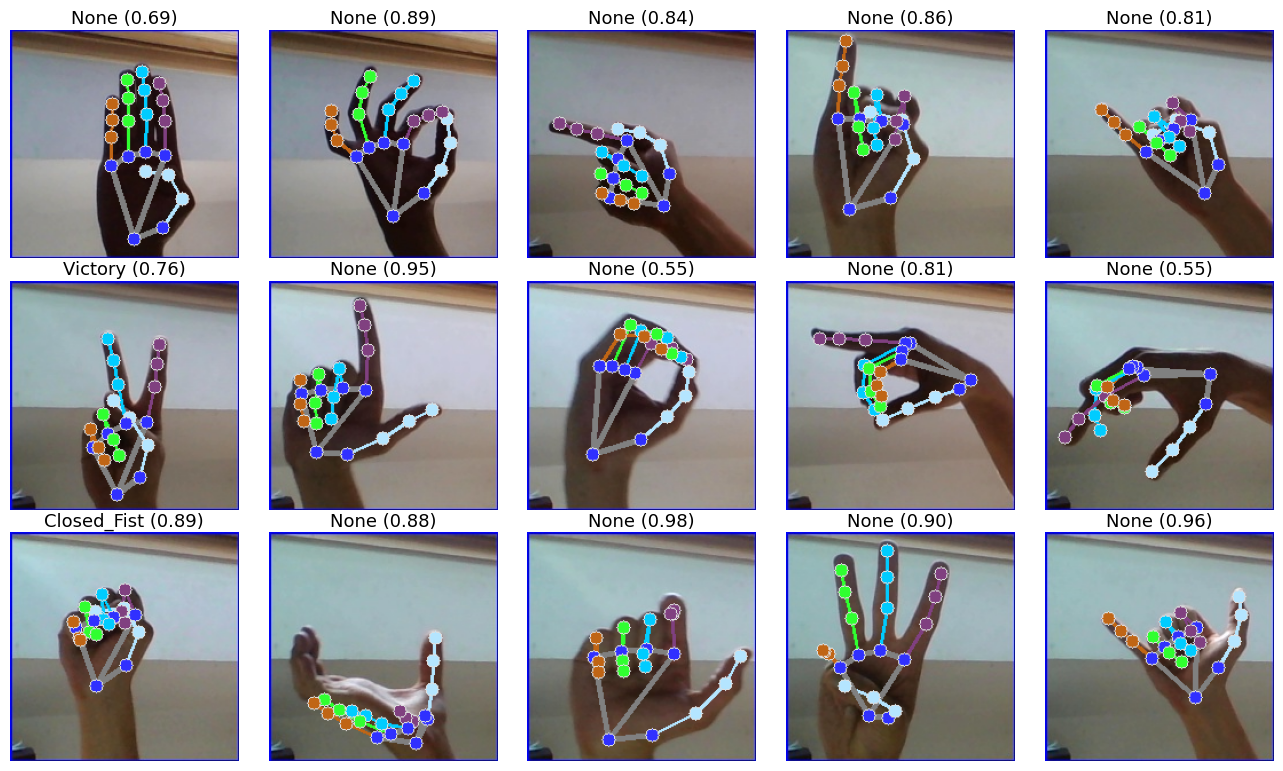

In [21]:
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
results = []
results_unrecognized = []

for image_file_name in X_Test:
    # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)
    # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)

  print(recognition_result)
  # STEP 5: Process the result. In this case, visualize it.

  if recognition_result.gestures:
    images.append(image)
    top_gesture = recognition_result.gestures[0][0]
    hand_landmarks = recognition_result.hand_landmarks
    results.append((top_gesture, hand_landmarks))

  else:
    # Manejar el caso en que no se hayan reconocido gestos
    results_unrecognized.append(("No gesture recognized", None))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)


In [22]:
results_unrecognized

[('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None),
 ('No gesture recognized', None)]

Muchas de las imagenes no son detectadas por el modelo, tendremos que entrenarlo con nuestro dataset, así como cambiar las categorias resultantes.

